<a href="https://colab.research.google.com/github/ehssan66/Iot_Data_EDA/blob/main/Iot_Data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ehssan66/Iot_Data_EDA.git
%cd Iot_Data_EDA
!ls

Cloning into 'Iot_Data_EDA'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 4.08 KiB | 4.08 MiB/s, done.
/content/Iot_Data_EDA
Iot_Data_EDA.ipynb  README.md


In [ ]:
!ls /content

Iot_Data_EDA  sample_data


In [ ]:
!cp /content/Iot_Data_EDA.ipynb /content/Iot_Data_EDA/
!ls /content/Iot_Data_EDA

cp: cannot stat '/content/Iot_Data_EDA.ipynb': No such file or directory
Iot_Data_EDA.ipynb  README.md


In [ ]:
import os
import glob
import math
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 300)
pd.set_option("display.width", 140)

print("Environment ready ✅")

Environment ready ✅


In [ ]:
!pip -q install kagglehub

In [ ]:
import kagglehub

# Download latest version
dataset_path = kagglehub.dataset_download("akashdogra/cic-iot-2023")

print("Path to dataset files:", dataset_path)
print("Files:", os.listdir(dataset_path)[:20])

100%|██████████| 2.77G/2.77G [00:41<00:00, 71.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/akashdogra/cic-iot-2023/versions/1
Files: ['part-00071-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv', 'part-00144-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv', 'part-00120-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv', 'part-00069-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv', 'part-00059-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv', 'part-00133-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv', 'part-00105-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv', 'part-00012-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv', 'part-00140-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv', 'part-00078-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv', 'part-00063-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv', 'part-00127-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv', 'part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv', 'part-00033-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv', 'part-00092-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv', 'p

In [ ]:
csv_files = sorted(glob.glob(os.path.join(dataset_path, "*.csv")))
print("Number of CSV files:", len(csv_files))
csv_files[:10]

Number of CSV files: 169


['/root/.cache/kagglehub/datasets/akashdogra/cic-iot-2023/versions/1/part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
 '/root/.cache/kagglehub/datasets/akashdogra/cic-iot-2023/versions/1/part-00001-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
 '/root/.cache/kagglehub/datasets/akashdogra/cic-iot-2023/versions/1/part-00002-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
 '/root/.cache/kagglehub/datasets/akashdogra/cic-iot-2023/versions/1/part-00003-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
 '/root/.cache/kagglehub/datasets/akashdogra/cic-iot-2023/versions/1/part-00004-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
 '/root/.cache/kagglehub/datasets/akashdogra/cic-iot-2023/versions/1/part-00005-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
 '/root/.cache/kagglehub/datasets/akashdogra/cic-iot-2023/versions/1/part-00006-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
 '/root/.cache/kagglehub/datasets/akashdogra/cic-iot-2023/versions/1/part-00007-363d1ba3-8ab5-4f96-bc25-

In [ ]:
def read_csv_safe(path, nrows=None):
    """
    Reads a CSV safely. If it fails due to encoding issues, tries alternative encodings.
    """
    try:
        return pd.read_csv(path, nrows=nrows, low_memory=False)
    except UnicodeDecodeError:
        return pd.read_csv(path, nrows=nrows, encoding="latin1", low_memory=False)

In [ ]:
assert len(csv_files) > 0, "No CSV files found in the dataset folder."

first_file = csv_files[0]
print("Inspecting file:", os.path.basename(first_file))

df = read_csv_safe(first_file)
print("Shape:", df.shape)
df.head()

Inspecting file: part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
Shape: (238687, 47)


,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.00,1.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.0,54.000000,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,581.33,54.00,66.3,54.796404,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.00,42.0,42.000000,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.0,50.000000,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.01,0.04,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,644.60,57.88,131.6,67.959230,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood


In [ ]:
display(df.info())
df.describe(include="all").T.head(40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238687 entries, 0 to 238686
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    238687 non-null  float64
 1   Header_Length    238687 non-null  float64
 2   Protocol Type    238687 non-null  float64
 3   Duration         238687 non-null  float64
 4   Rate             238687 non-null  float64
 5   Srate            238687 non-null  float64
 6   Drate            238687 non-null  float64
 7   fin_flag_number  238687 non-null  float64
 8   syn_flag_number  238687 non-null  float64
 9   rst_flag_number  238687 non-null  float64
 10  psh_flag_number  238687 non-null  float64
 11  ack_flag_number  238687 non-null  float64
 12  ece_flag_number  238687 non-null  float64
 13  cwr_flag_number  238687 non-null  float64
 14  ack_count        238687 non-null  float64
 15  syn_count        238687 non-null  float64
 16  fin_count        238687 non-null  floa

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
flow_duration,238687.0,NaN,NaN,NaN,5.907665,327.743332,0.0,0.0,0.0,0.104513,68430.712218
Header_Length,238687.0,NaN,NaN,NaN,77009.972463,459646.332766,0.0,54.0,54.0,336.895,9809699.6
Protocol Type,238687.0,NaN,NaN,NaN,9.05257,8.902223,0.0,6.0,6.0,14.12,47.0
Duration,238687.0,NaN,NaN,NaN,66.345189,14.025283,0.0,64.0,64.0,64.0,255.0
Rate,238687.0,NaN,NaN,NaN,9384.479106,100783.932217,0.0,2.092589,15.839218,119.146576,7340032.0
Srate,238687.0,NaN,NaN,NaN,9384.479106,100783.932217,0.0,2.092589,15.839218,119.146576,7340032.0
Drate,238687.0,NaN,NaN,NaN,0.000005,0.001765,0.0,0.0,0.0,0.0,0.848465
fin_flag_number,238687.0,NaN,NaN,NaN,0.086532,0.281148,0.0,0.0,0.0,0.0,1.0
syn_flag_number,238687.0,NaN,NaN,NaN,0.206132,0.404527,0.0,0.0,0.0,0.0,1.0
rst_flag_number,238687.0,NaN,NaN,NaN,0.090646,0.287106,0.0,0.0,0.0,0.0,1.0


In [ ]:
dtype_counts = df.dtypes.value_counts()
dtype_counts

,count
float64,46
object,1


In [ ]:
missing = df.isna().sum()
missing_pct = (missing / len(df)) * 100

missing_table = (
    pd.DataFrame({"missing_count": missing, "missing_%": missing_pct})
    .sort_values("missing_count", ascending=False)
)

missing_table = missing_table[missing_table["missing_count"] > 0]
missing_table.head(60)

,missing_count,missing_%


In [ ]:
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

Duplicate rows: 0


In [ ]:
def detect_target_column(columns):
    candidates = ["label", "Label", "attack", "Attack", "class", "Class", "target", "Target", "type", "Type", "category", "Category"]
    for c in candidates:
        if c in columns:
            return c
    # fallback: try any column that looks like label
    for c in columns:
        if "label" in c.lower() or "attack" in c.lower() or "class" in c.lower():
            return c
    return None

TARGET = detect_target_column(df.columns)
print("Detected TARGET column:", TARGET)

Detected TARGET column: label


,count
label,
DDoS-ICMP_Flood,36554
DDoS-UDP_Flood,27626
DDoS-TCP_Flood,23149
DDoS-PSHACK_Flood,21210
DDoS-SYN_Flood,20739
DDoS-RSTFINFlood,20669
DDoS-SynonymousIP_Flood,18189
DoS-UDP_Flood,16957
DoS-TCP_Flood,13630


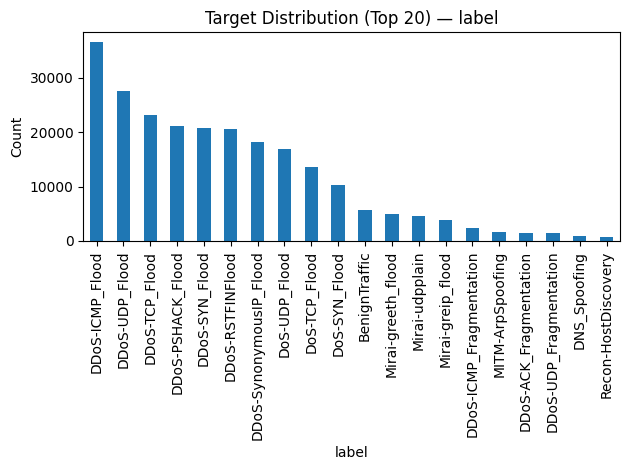

In [ ]:
if TARGET is not None:
    vc = df[TARGET].astype(str).value_counts()
    display(vc.head(30))

    plt.figure()
    vc.head(20).plot(kind="bar")
    plt.title(f"Target Distribution (Top 20) — {TARGET}")
    plt.xlabel(TARGET)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
else:
    print("No obvious target column detected. We'll proceed with feature-only EDA.")

In [ ]:
df_clean = df.copy()

# Drop fully empty columns
df_clean = df_clean.dropna(axis=1, how="all")

# Drop duplicates
df_clean = df_clean.drop_duplicates()

print("Before:", df.shape, "| After cleaning:", df_clean.shape)

Before: (238687, 47) | After cleaning: (238687, 47)


In [ ]:
num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_clean.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Numeric columns:", len(num_cols))
print("Categorical columns:", len(cat_cols))
print("Example numeric:", num_cols[:10])
print("Example categorical:", cat_cols[:10])

Numeric columns: 46
Categorical columns: 1
Example numeric: ['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number']
Example categorical: ['label']


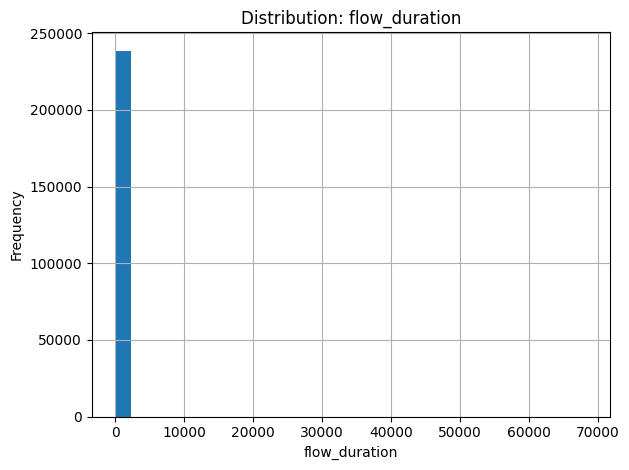

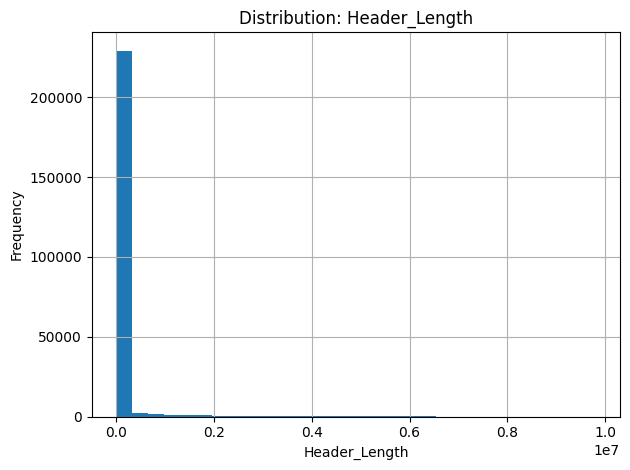

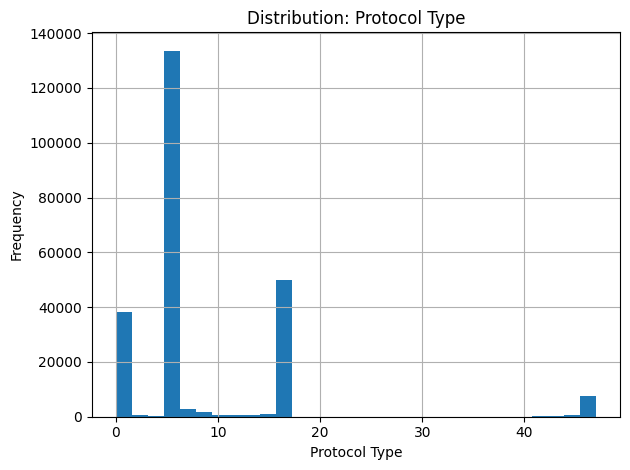

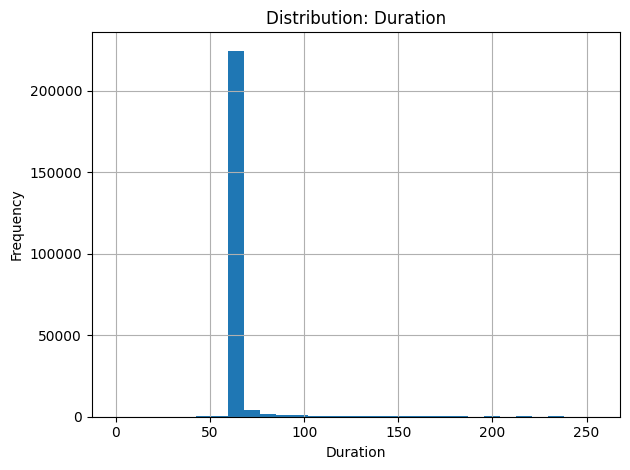

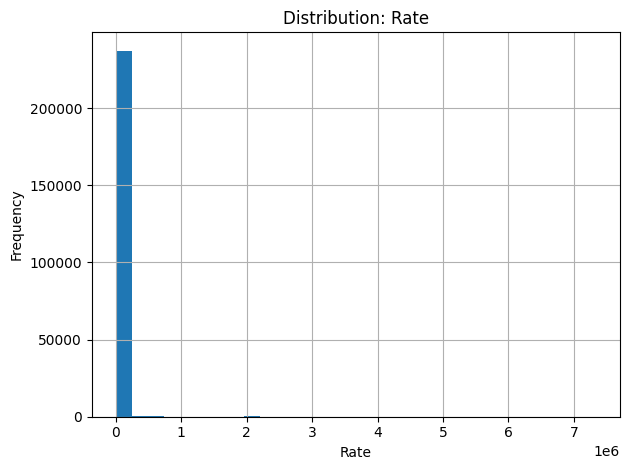

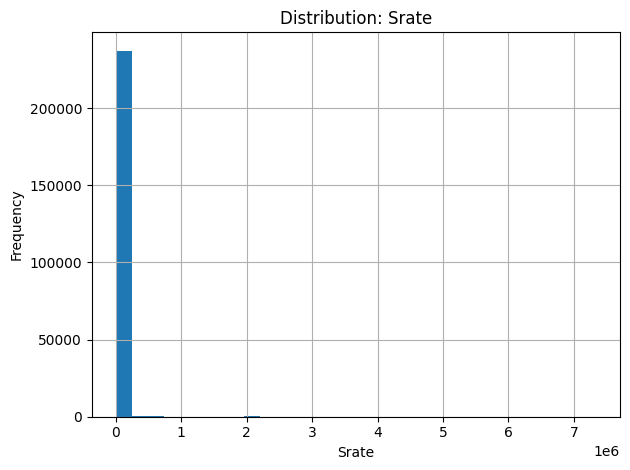

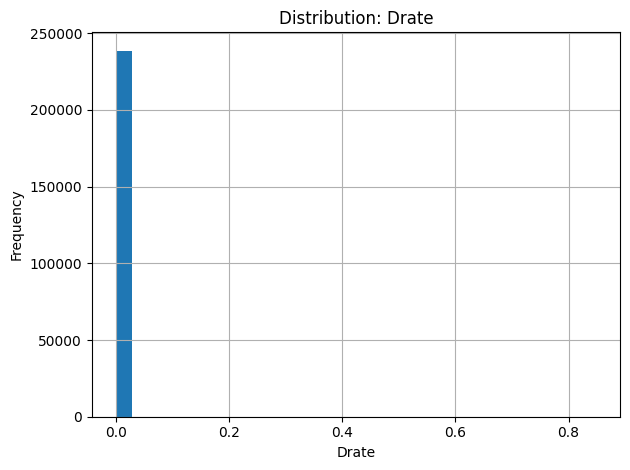

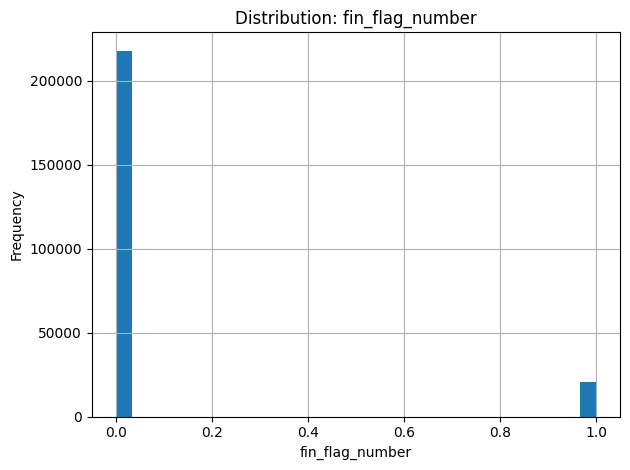

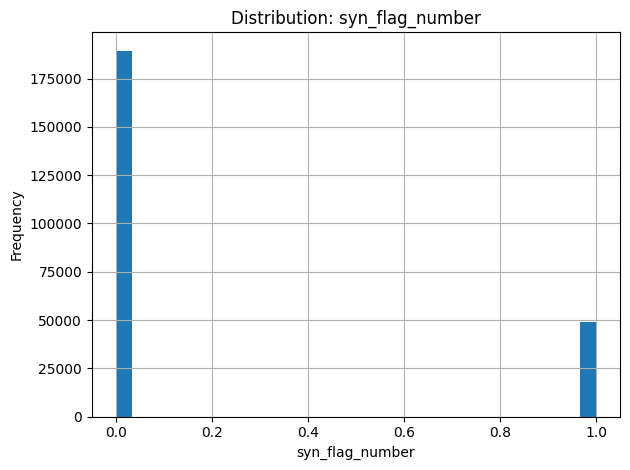

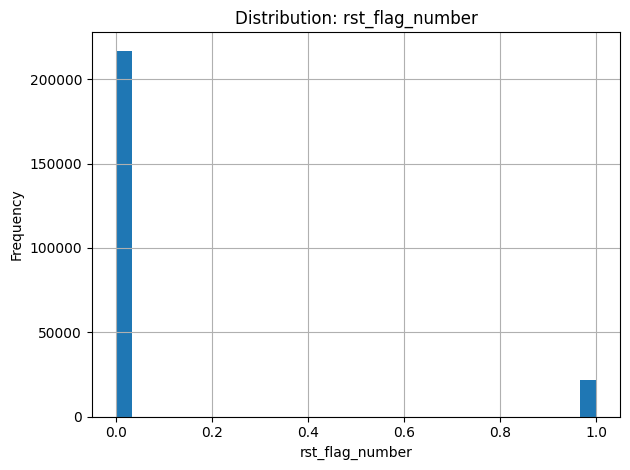

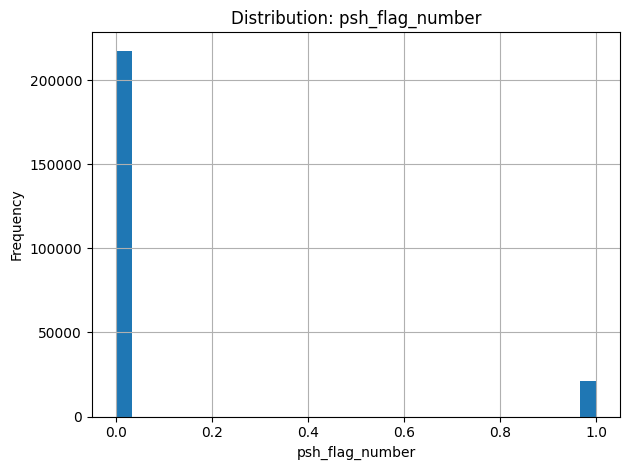

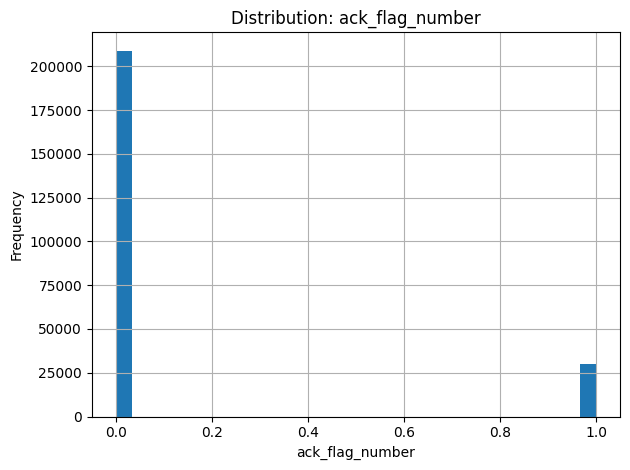

In [ ]:
for col in num_cols[:12]:
    plt.figure()
    df_clean[col].dropna().hist(bins=30)
    plt.title(f"Distribution: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

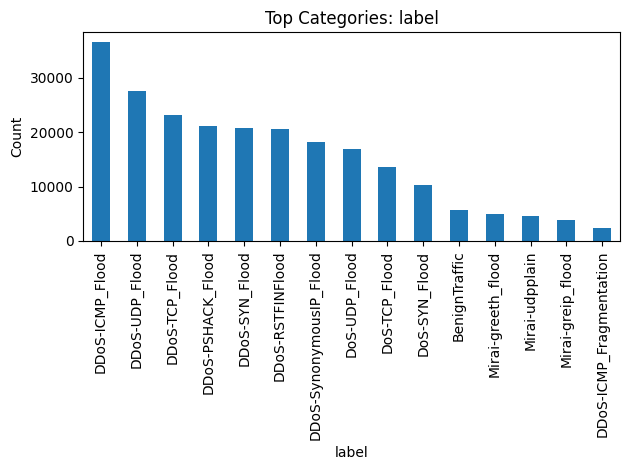

In [ ]:
for col in cat_cols[:1]:
    plt.figure()
    df_clean[col].astype(str).value_counts().head(15).plot(kind="bar")
    plt.title(f"Top Categories: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

In [ ]:
def outlier_summary_iqr(df, cols):
    rows = []
    for c in cols:
        x = df[c].dropna()
        if x.empty:
            continue
        q1, q3 = x.quantile(0.25), x.quantile(0.75)
        iqr = q3 - q1
        if iqr == 0:
            continue
        low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
        outliers = ((x < low) | (x > high)).sum()
        rows.append((c, int(outliers), float(outliers/len(x)*100)))
    return pd.DataFrame(rows, columns=["feature", "outlier_count", "outlier_%"]).sort_values("outlier_count", ascending=False)

outlier_summary_iqr(df_clean, num_cols).head(25)

,feature,outlier_count,outlier_%
10,Max,76222,31.933872
11,AVG,73313,30.715121
13,Tot size,73276,30.699619
15,Magnitue,72963,30.568485
8,Tot sum,72962,30.568066
9,Min,68355,28.637923
1,Header_Length,57611,24.136631
5,syn_count,56992,23.877295
6,rst_count,54001,22.624190
17,Covariance,53597,22.454931


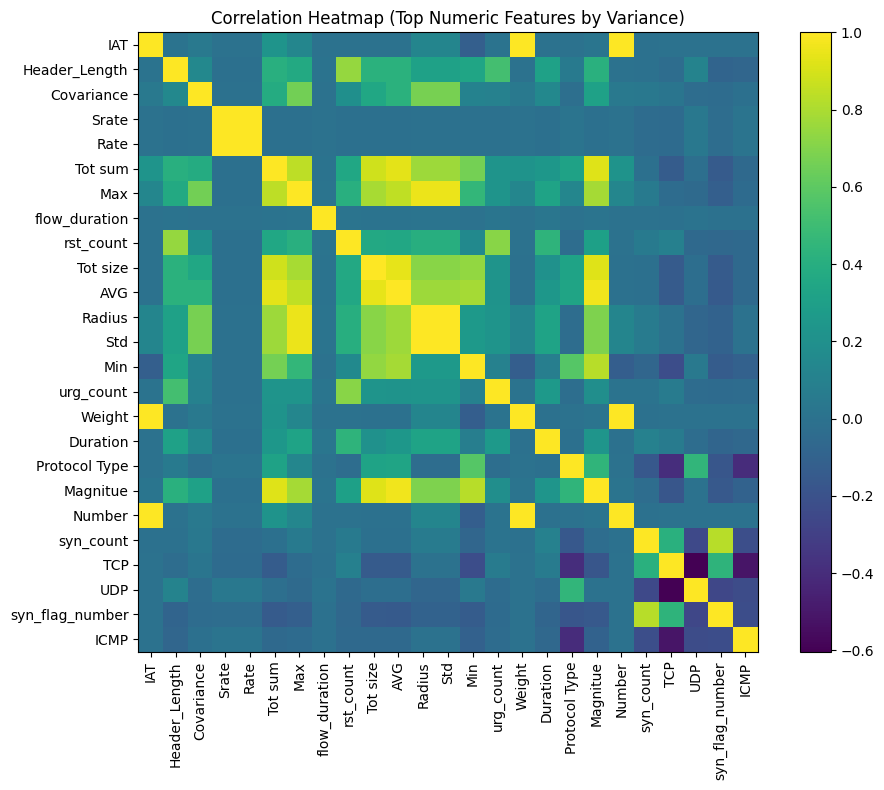

In [ ]:
if len(num_cols) >= 2:
    # choose up to 25 numeric columns with highest variance
    variances = df_clean[num_cols].var(numeric_only=True).sort_values(ascending=False)
    top_num = variances.head(min(25, len(variances))).index.tolist()

    corr = df_clean[top_num].corr(numeric_only=True)

    plt.figure(figsize=(10, 8))
    plt.imshow(corr)
    plt.title("Correlation Heatmap (Top Numeric Features by Variance)")
    plt.colorbar()
    plt.xticks(range(len(top_num)), top_num, rotation=90)
    plt.yticks(range(len(top_num)), top_num)
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for correlation.")

In [ ]:
os.makedirs("outputs", exist_ok=True)

# Save missing table for first file analysis
missing_table.to_csv("outputs/missing_values_first_file.csv", index=True)

# Save outlier summary
outliers_table = outlier_summary_iqr(df_clean, num_cols)
outliers_table.to_csv("outputs/outliers_first_file.csv", index=False)

print("Saved outputs ✅")
print(os.listdir("outputs"))

Saved outputs ✅
['missing_values_first_file.csv', 'outliers_first_file.csv']
